In [1]:
#Import file from Google Drive
from google.colab import drive
drive. mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import os
import zipfile
from sklearn.model_selection import train_test_split
import shutil

In [3]:
#Unzip the dataset into /Image directory

zip_file = '/content/drive/MyDrive/Capstone Attacne/Image Dataset/Dataset/Gabungan fix.zip'

zip_ref = zipfile.ZipFile(zip_file, 'r')

zip_ref.extractall('./Image Dataset/Dataset/Gabungan fix')
zip_ref.close()

In [4]:
#Create base directory for each class of acne

base_dir = './Image Dataset/Dataset/Gabungan fix/Gabungan'

base_dir_blackhead = os.path.join(base_dir, 'Blackhead')
base_dir_nodules = os.path.join(base_dir, 'Nodules')
base_dir_papules = os.path.join(base_dir, 'Papules')
base_dir_pustules = os.path.join(base_dir, 'Pustules')
base_dir_whitehead = os.path.join(base_dir, 'Whitehead')
base_dir_healthy = os.path.join(base_dir, "Healthy skin")

#Print the number of each class datasets
print('Total Blackhead images:', (len(os.listdir(base_dir_blackhead))))
print('Total Nodules images:', (len(os.listdir(base_dir_nodules))))
print('Total Papules images:', (len(os.listdir(base_dir_papules))))
print('Total Pustules images:', (len(os.listdir(base_dir_pustules))))
print('Total Whitehead images:', (len(os.listdir(base_dir_whitehead))))
print('Total Healthy skin images:', (len(os.listdir(base_dir_healthy))))

Total Blackhead images: 181
Total Nodules images: 183
Total Papules images: 184
Total Pustules images: 182
Total Whitehead images: 183
Total Healthy skin images: 179


In [5]:
#Define the ouput directory as root directory for training and validation
root_dir = '/content/Image Dataset/Dataset/GabunganAcne'

#Define each class of Acne as Subdirectory Name
class_labels =  ['Blackhead', 'Nodules', 'Papules', 'Pustules', 'Whitehead', 'Healthy skin']

#Create train-val directories
train_dir = os.path.join(root_dir, 'train')
val_dir = os.path.join(root_dir, 'val')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Split the dataset into train and validation sets
for label in class_labels:
    class_dir = os.path.join(base_dir, label)
    train_class_dir = os.path.join(train_dir, label)
    val_class_dir = os.path.join(val_dir, label)

    # Create class directories in the train and validation directories
    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(val_class_dir, exist_ok=True)

    # Get the list of image filenames in the class directory
    image_files = os.listdir(class_dir)

    # Split the image filenames into train and validation sets
    train_files, val_files = train_test_split(image_files, test_size=0.25, random_state=42)

    # Move the train images to the train class directory
    for file in train_files:
        src_path = os.path.join(class_dir, file)
        dst_path = os.path.join(train_class_dir, file)
        shutil.copy(src_path, dst_path)

    # Move the validation images to the validation class directory
    for file in val_files:
        src_path = os.path.join(class_dir, file)
        dst_path = os.path.join(val_class_dir, file)
        shutil.copy(src_path, dst_path)

for rootdir, dirs, files in os.walk(root_dir):
  for subdir in dirs:
    print(os.path.join(rootdir, subdir))


/content/Image Dataset/Dataset/GabunganAcne/train
/content/Image Dataset/Dataset/GabunganAcne/val
/content/Image Dataset/Dataset/GabunganAcne/train/Whitehead
/content/Image Dataset/Dataset/GabunganAcne/train/Nodules
/content/Image Dataset/Dataset/GabunganAcne/train/Healthy skin
/content/Image Dataset/Dataset/GabunganAcne/train/Pustules
/content/Image Dataset/Dataset/GabunganAcne/train/Papules
/content/Image Dataset/Dataset/GabunganAcne/train/Blackhead
/content/Image Dataset/Dataset/GabunganAcne/val/Whitehead
/content/Image Dataset/Dataset/GabunganAcne/val/Nodules
/content/Image Dataset/Dataset/GabunganAcne/val/Healthy skin
/content/Image Dataset/Dataset/GabunganAcne/val/Pustules
/content/Image Dataset/Dataset/GabunganAcne/val/Papules
/content/Image Dataset/Dataset/GabunganAcne/val/Blackhead


In [6]:
#Define file path of each directories after train-val split
train_blackhead_dir = os.path.join(train_dir, 'Blackhead')
train_nodules_dir = os.path.join(train_dir, 'Nodules')
train_papules_dir = os.path.join(train_dir, 'Papules')
train_pustules_dir = os.path.join(train_dir, 'Pustules')
train_whitehead_dir = os.path.join(train_dir, 'Whitehead')
train_healthy_dir = os.path.join(train_dir, 'Healthy skin')

validation_blackhead_dir = os.path.join(val_dir, 'Blackhead')
validation_nodules_dir = os.path.join(val_dir, 'Nodules')
validation_papules_dir = os.path.join(val_dir, 'Papules')
validation_pustules_dir = os.path.join(val_dir, 'Pustules')
validation_whitehead_dir = os.path.join(val_dir, 'Whitehead')
validation_healthy_dir = os.path.join(val_dir, 'Healthy skin')

In [7]:
#Print the number of images in each train-val directories
print('total Blackhead Training Images :', len(os.listdir(train_blackhead_dir)))
print('total Nodules Training Images :', len(os.listdir(train_nodules_dir)))
print('total Papules Training Images :', len(os.listdir(train_papules_dir)))
print('total Pustules Training Images :', len(os.listdir(train_pustules_dir)))
print('total Whitehead Training Images :', len(os.listdir(train_whitehead_dir)))
print('total Healthy skin Training Images:', len(os.listdir(train_healthy_dir)))

print('total Blackhead Validation Images :', len(os.listdir(validation_blackhead_dir)))
print('total Nodules Validation Images :', len(os.listdir(validation_nodules_dir)))
print('total Papules Validation Images :', len(os.listdir(validation_papules_dir)))
print('total Pustules Validation Images :', len(os.listdir(validation_pustules_dir)))
print('total Whitehead Validation Images :', len(os.listdir(validation_whitehead_dir)))
print('total Healthy skin Validation Images', len(os.listdir(validation_healthy_dir)))

total Blackhead Training Images : 135
total Nodules Training Images : 137
total Papules Training Images : 138
total Pustules Training Images : 136
total Whitehead Training Images : 137
total Healthy skin Training Images: 134
total Blackhead Validation Images : 46
total Nodules Validation Images : 46
total Papules Validation Images : 46
total Pustules Validation Images : 46
total Whitehead Validation Images : 46
total Healthy skin Validation Images 45


In [8]:
#Image Preprocessing and Augmentation
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   fill_mode = 'nearest')
val_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 12,
                                                    class_mode = 'categorical',
                                                    target_size = (128, 128))

val_generator = train_datagen.flow_from_directory(val_dir,
                                                  batch_size = 6,
                                                  class_mode = 'categorical',
                                                  target_size = (128, 128))

Found 772 images belonging to 6 classes.
Found 260 images belonging to 6 classes.


In [9]:
#using mobilenet for build model
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input


pre_trained_model = MobileNet(input_shape = (128, 128, 3), weights = 'imagenet', include_top = False)

17225924/17225924 [==============================] - 0s 0us/step


In [10]:
#print pre trained model summary
pre_trained_model.summary()

Model: "mobilenet_1.00_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 64, 64, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 64, 64, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 64, 64, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 64, 64, 32)       128       
 ation)                                         

In [11]:
#Add additional layer for making new model
from tensorflow.keras import Model

# Flatten the output layer to 1 dimension
x = tf.keras.layers.Flatten()(pre_trained_model.output)
# Add a fully connected layer with 128 hidden units and ReLU activation
x = tf.keras.layers.Dense(128, activation='relu')(x)
# Add a dropout rate of 0.4
x = tf.keras.layers.Dropout(0.40)(x)
# Add a final softmax layer for classification
x = tf.keras.layers.Dense  (6, activation='softmax')(x)

# Append the dense network to the base model
model = Model(pre_trained_model.input, x)

# Print the model summary. See your dense network connected at the end.
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 64, 64, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 64, 64, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 64, 64, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 64, 64, 32)       128       
 ation)                                                      

In [12]:
class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('val_accuracy')>0.80):
      print('Good enough accuracy so cancelling training!')
      self.model.stop_training = True

callback = MyCallback()

In [13]:
model.compile(optimizer = Adam(learning_rate = 0.0001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 64, 64, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 64, 64, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 64, 64, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 64, 64, 32)       128       
 ation)                                                      

In [15]:
history = model.fit(
            train_generator,
            validation_data = val_generator,
            steps_per_epoch = 64,
            epochs = 50,
            validation_steps = 44,
            verbose = 2,
            callbacks = [callback])

Epoch 1/50
64/64 - 58s - loss: 2.2239 - accuracy: 0.3553 - val_loss: 1.3328 - val_accuracy: 0.4808 - 58s/epoch - 906ms/step
Epoch 2/50
64/64 - 25s - loss: 1.2140 - accuracy: 0.5382 - val_loss: 1.1781 - val_accuracy: 0.5577 - 25s/epoch - 393ms/step
Epoch 3/50
64/64 - 27s - loss: 1.1756 - accuracy: 0.5697 - val_loss: 1.0435 - val_accuracy: 0.5769 - 27s/epoch - 423ms/step
Epoch 4/50
64/64 - 26s - loss: 1.0524 - accuracy: 0.5895 - val_loss: 0.9658 - val_accuracy: 0.6346 - 26s/epoch - 402ms/step
Epoch 5/50
64/64 - 25s - loss: 0.8982 - accuracy: 0.6526 - val_loss: 0.9389 - val_accuracy: 0.6538 - 25s/epoch - 398ms/step
Epoch 6/50
64/64 - 26s - loss: 0.8294 - accuracy: 0.7026 - val_loss: 0.9115 - val_accuracy: 0.6654 - 26s/epoch - 402ms/step
Epoch 7/50
64/64 - 28s - loss: 0.7699 - accuracy: 0.6921 - val_loss: 0.8478 - val_accuracy: 0.7000 - 28s/epoch - 437ms/step
Epoch 8/50
64/64 - 26s - loss: 0.7147 - accuracy: 0.7289 - val_loss: 0.8592 - val_accuracy: 0.6846 - 26s/epoch - 404ms/step
Epoch 9/

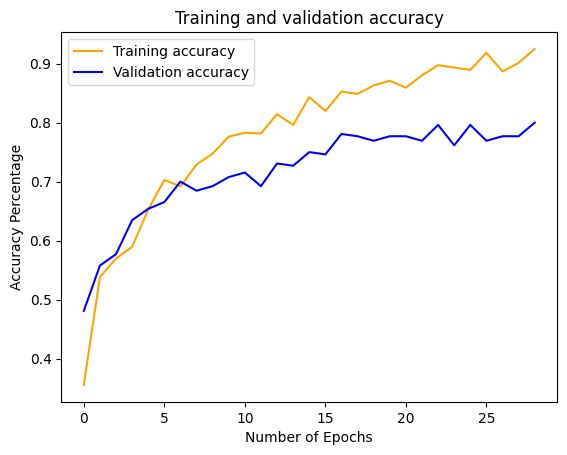

<Figure size 800x800 with 0 Axes>

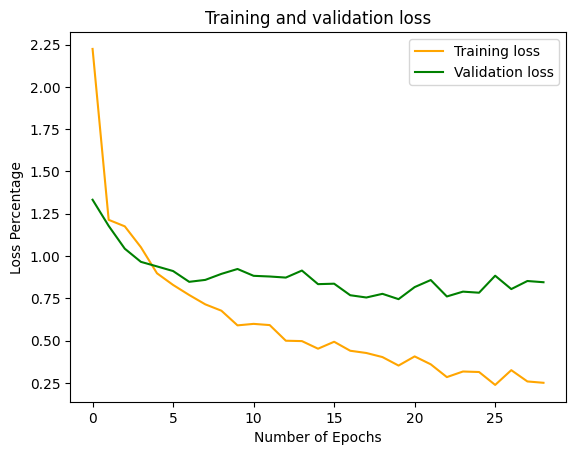

<Figure size 800x800 with 0 Axes>

In [16]:
# Plot the Learning Curves of the Model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

#Plot training and validation accuracy result
plt.plot(epochs, acc, 'orange', label='Training accuracy')
plt.plot(epochs, val_acc, 'blue', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy Percentage')
plt.legend()
plt.figure(figsize = (8,8))

plt.show()

#Plot training and validation loss result
plt.plot(epochs, loss, 'orange', label='Training loss')
plt.plot(epochs, val_loss, 'green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss Percentage')
plt.legend()
plt.figure(figsize = (8,8))

plt.show()

In [ ]:
# Plot the confusion matrix. Set Normalize = True/False For Data Validation
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# On test dataset
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['Blackhead', 'Papules', 'Pustules', 'Nodules', 'Whitehead', 'Healthy skin']

# Confusion Matrix
cm = confusion_matrix(val_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')

# Classification Report
print('Classification Report')
print(classification_report(val_generator.classes, y_pred, target_names=target_names))

In [24]:
#Save model into h5 format

saved_model_path = "/content/drive/MyDrive/Capstone Attacne/Model 1.h5"

model.save(saved_model_path)

Saving pustule test 2.jpeg to pustule test 2 (1).jpeg
1/1 [==============================] - 0s 42ms/step
percentage:
[[2.7364498e-05 1.6212891e-04 1.7904051e-01 2.8017399e-01 5.2468914e-01
  1.5906874e-02]]
Kamu mengalami Pustules pada wajahmu.
Berikut adalah hal yang dapat kamu lakukan untuk merawat wajahmu:
Gunakan produk-produk yang tidak mengandung minyak dan non-comedogenic


<Figure size 200x200 with 0 Axes>

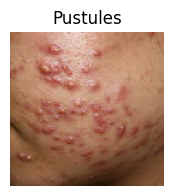

In [44]:
from tensorflow.keras.preprocessing import image
from google.colab import files
from PIL import Image
from keras.models import load_model

class_indices = {}
for j, u in train_generator.class_indices.items():
    class_indices[u] = j

def predict_new_images(model, class_indices):

    uploads = files.upload()

    n_files = len(uploads)
    fig = plt.figure(figsize=(2, 2 * n_files))

    for i, filename in enumerate(uploads):
        IMG = image.load_img(
            filename,
            target_size=(128, 128))

    x = image.img_to_array(IMG)/255
    x = np.expand_dims(x, axis=0)

    predict = model.predict(x)
    class_prediction = np.argmax(predict)
    prediction = class_indices[class_prediction]

    fig = plt.figure(figsize = (2, 2))
    ax = fig.add_subplot(1, 1, 1)
    ax.imshow(IMG)
    ax.set_title(prediction)
    ax.axis(False)
    print('percentage:')
    print(predict)

    return prediction

#Giving ingredients skincare, treatment recommendation, and do's and dont's from the classification results
def skincare_tips(prediction):

    # Load the CNN model
    model = load_model('/content/drive/MyDrive/Capstone Attacne/Model 1.h5')

    # Define the class labels
    class_labels = ['Blackhead', 'Papules', 'Pustules', 'Nodules', 'Whitehead', 'Healthy skin']

    # Define the skincare tips for each class
    skincare_tips = {
        'Blackhead': 'Bersihkan wajah secara rutin dan gunakan produk skincare yang mengandung salicylic acid',
        'Whitehead': 'Lakukan exfoliasi secara rutin dengan alat dan produk yang lembut. Hindari produk-produk yang dapat menyumbat pori-pori kamu',
        'Papules': 'Aplikasikan produk yang dapat mengurangi inflamasi pada wajah, seperti menggunakan produk yang mengandung benzoyl peroxide atau salicylic acid',
        'Pustules': 'Gunakan produk-produk yang tidak mengandung minyak dan non-comedogenic',
        'Nodules': 'Jerawat jenis nodules perlu konsultasi dengan ahli dermatologi',
        'Healthy skin': 'Pertahankan kondisi wajahmu dengan tetap rutin menggunakan skincare yang cocok dengan kulitmu. Jangan lupa untuk selalu double cleansing, menggunakan moisturizer, dan memakain sunscreen untuk menjaga kulit tetap lembap dan terlindung dari sinar matahari.'
    }

    # Print the message and skincare tips
    if prediction == 'Healthy skin':
      print("Wajah kamu terlihat sehat dan bebas acne")
      print(skincare_tips[prediction])
    else:
      print("Kamu mengalami", prediction, "pada wajahmu.")
      print("Berikut adalah hal yang dapat kamu lakukan untuk merawat wajahmu:")
      print(skincare_tips[prediction])

predicted_class = predict_new_images(model, class_indices)
skincare_tips(predicted_class)

In [42]:
from google.colab import files
folder_path = '/content/Image Dataset/Dataset/GabunganAcne'
zip_path = '/content/drive/MyDrive/Capstone Attacne'

shutil.make_archive(zip_path, 'zip', folder_path)

'/content/drive/MyDrive/Capstone Attacne.zip'

In [ ]:
files.download('/content/drive/MyDrive/Capstone Attacne.zip')

In [43]:
#Install tensorflowjs
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 23.1
    Uninstalling packaging-23.1:
      Successfully uninstalled packaging-23.1
  Attempting uninstall: flax
    Found existing installation: flax 0.6.9
    Uninstalling flax-0.6.9:
      Successfully uninstalled flax-0.6.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
statsmodels 0.13.5 requires packaging>=21.3, but you have packaging 20.9 which is incompatible.
xar

In [45]:
import tensorflowjs as tfjs

tfjs.converters.save_keras_model(model, "/content/drive/MyDrive/Capstone Attacne/Model-tfjs")